In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

path = "/content/drive/MyDrive/ImageProcessing/Assignment-25"

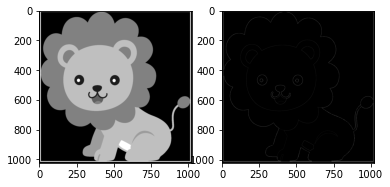

In [71]:
img = cv2.imread(os.path.join(path, "Inputs/lion.png"), cv2.IMREAD_GRAYSCALE)
plt.subplot(1,2,1).imshow(img, cmap = "gray")

mask = np.array(((0, -1, 0), (-1, 4, -1), (0, -1, 0)))

convolved_image = np.zeros((img.shape[0]-2, img.shape[1]-2), dtype="uint8")

for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):

        sum = np.sum(np.multiply(mask, img[i-1: i+2, j-1: j+2]))

        if sum < 0:
          sum = 0

        convolved_image[i-1, j-1] = sum

cv2.imwrite(os.path.join(path,"Result/lion.jpg"), convolved_image)
plt.subplot(1,2,2).imshow(convolved_image, cmap = "gray")



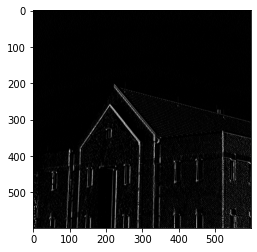

In [72]:
img = cv2.imread(os.path.join(path, "Inputs/building.tif"), cv2.IMREAD_GRAYSCALE)
# plt.subplot(1,2,1).imshow(img, cmap = "gray")

mask = np.array(((-1, 0, 1), (-1, 0, 1), (-1, 0, 1)))

convolved_image = np.zeros((img.shape[0]-2, img.shape[1]-2), dtype="uint8")

for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):

        sum = np.sum(np.multiply(mask, img[i-1: i+2, j-1: j+2]))

        if sum < 0:
          sum = 0

        convolved_image[i-1, j-1] = sum 

cv2.imwrite(os.path.join(path,"Result/building01.jpg"), convolved_image)
# plt.subplot(1,2,2).imshow(convolved_image, cmap = "gray")
plt.imshow(convolved_image, cmap = "gray")

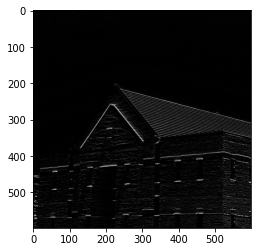

In [73]:
img = cv2.imread(os.path.join(path, "Inputs/building.tif"), cv2.IMREAD_GRAYSCALE)
# plt.subplot(1,2,1).imshow(img, cmap = "gray")

mask = np.array(((-1, -1, -1), (0, 0, 0), (1, 1, 1)))

convolved_image = np.zeros((img.shape[0]-2, img.shape[1]-2), dtype="uint8")

for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):

        sum = np.sum(np.multiply(mask, img[i-1: i+2, j-1: j+2]))

        if sum < 0:
          sum = 0 

        convolved_image[i-1, j-1] = sum

cv2.imwrite(os.path.join(path,"Result/building02.jpg"), convolved_image)
# plt.subplot(1,2,2).imshow(convolved_image, cmap = "gray")
plt.imshow(convolved_image, cmap = "gray")

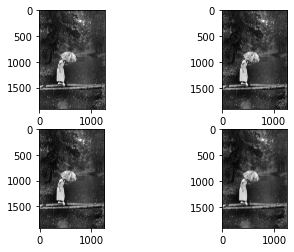

In [68]:
def convolved_image(filter_size, img):


    mask = np.ones((filter_size, filter_size)) * (1 / np.power(filter_size, 2))

    rows, cols = img.shape
    padding = filter_size//2
    convolved_image = np.zeros((rows- (2*padding), cols- (2*padding)), dtype="uint8")
    

    for i in range(padding, rows-padding):
        for j in range(padding, cols-padding):

            convolved_image[i-padding, j-padding] = np.sum(np.multiply(mask, img[i-padding: i+padding+1, j-padding: j+padding+1]))

    return convolved_image


img = cv2.imread(os.path.join(path, "Inputs/02.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

filter_size = [3, 5, 7, 15]
result = []
n=1

for i in range(len(filter_size)):

    img_ = convolved_image(filter_size[i], img)
    cv2.imwrite(os.path.join(path,f"Result/MedianFilter_size{filter_size[i]}.jpg"), img_)
    plt.subplot(2,2,n).imshow(img_, cmap = "gray")

    n = n+1
